# Import liberies

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# load data

In [22]:
df = pd.read_csv(r"netflix_titles.csv")

In [23]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Cleaning data

In [25]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [26]:
df.dropna(subset=['type','country','rating','duration'],inplace=True)

In [27]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2223
cast             671
country            0
date_added         9
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

# Analyzation

## Movies vs TV Shows: A Deep Dive into Netflix's Library



In [28]:
types=df['type'].value_counts()


In [29]:
types

Movie      5687
TV Show    2283
Name: type, dtype: int64

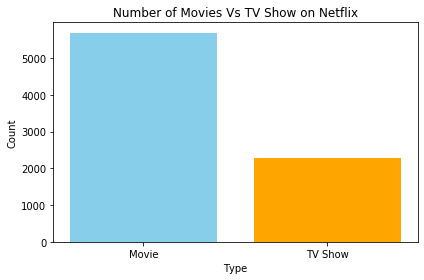

In [30]:
plt.figure(figsize=(6,4))
plt.bar(types.index, types.values, color=['skyblue','orange'])
plt.title('Number of Movies Vs TV Show on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')

plt.tight_layout()
plt.savefig('Movies Vs TV Show on Netflix.png',dpi =100)
plt.show()

## Analyzed the distribution of Netflix content ratings

In [31]:
rating_count = df['rating'].value_counts()

In [32]:
rating_count

TV-MA       2931
TV-14       1930
R            788
TV-PG        773
PG-13        482
PG           281
TV-Y7        236
TV-Y         227
TV-G         190
NR            80
G             41
TV-Y7-FV       5
NC-17          3
UR             3
Name: rating, dtype: int64

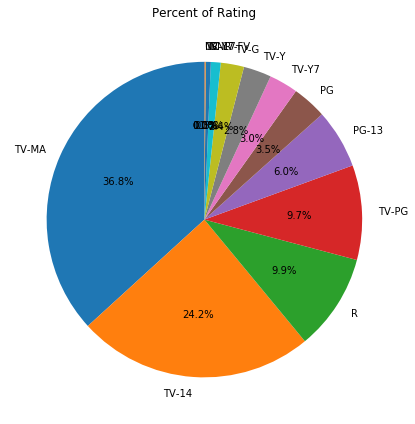

In [33]:
plt.figure(figsize = (8,6))
plt.pie(rating_count, labels=rating_count.index, autopct = "%1.1f%%", startangle=90)
plt.title('Percent of Rating')


plt.tight_layout()
plt.savefig('Rating.png',dpi =100)
plt.show()

In [34]:
movie_df=df[df['type']=='Movie'].copy()
movie_df['duration_int']=movie_df['duration'].str.replace(' min','').astype(int)

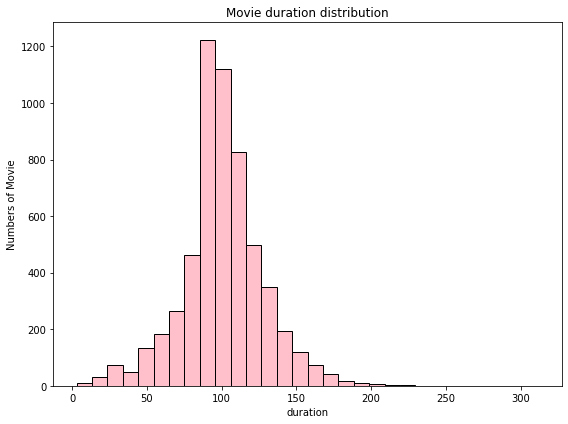

In [35]:
plt.figure(figsize = (8,6))
plt.hist(movie_df['duration_int'],bins=30,color='pink',edgecolor='black')
plt.title('Movie duration distribution')
plt.xlabel('duration')
plt.ylabel('Numbers of Movie')
plt.tight_layout()
plt.savefig('movie_duration_histogram.png')
plt.show()


## Top 10 Counries

In [38]:
country_count = df['country'].value_counts().head(10)

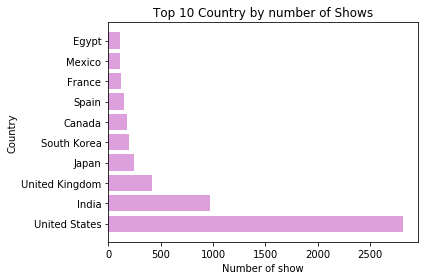

In [39]:
plt.barh(country_count.index,country_count.values, color='Plum')
plt.title('Top 10 Country by number of Shows')
plt.xlabel('Number of show')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('Top10_countries.png')
plt.show()

## Analysis by Year

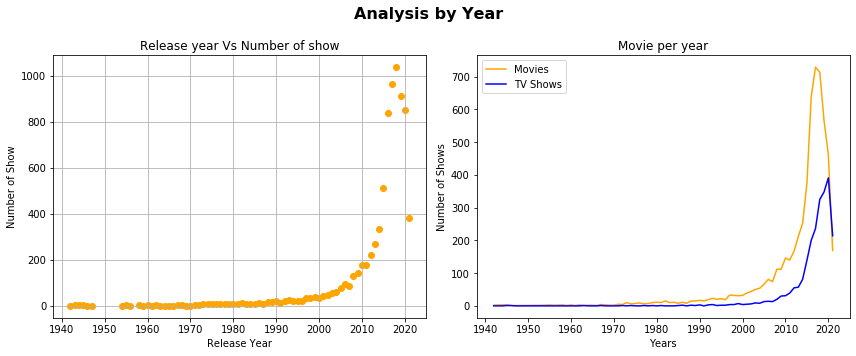

In [55]:
release_count=df['release_year'].value_counts().sort_index()
content_year = df.groupby(['release_year','type']).size().unstack().fillna(0)

fig, ax = plt.subplots(1,2, figsize=(12,5))
fig.suptitle('Analysis by Year',fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.92]) 

ax[0].scatter(release_count.index,release_count.values, color='orange')
ax[0].set_title('Release year Vs Number of show')
ax[0].set_xlabel('Release Year')
ax[0].set_ylabel('Number of Show')
ax[0].grid(True)
plt.tight_layout()



ax[1].plot(content_year.index, content_year['Movie'], color='Orange',label = 'Movies')
ax[1].plot(content_year.index, content_year['TV Show'],color='Blue', label='TV Shows')
ax[1].set_title('Movie per year')
ax[1].set_xlabel('Years')
ax[1].set_ylabel('Number of Shows')
ax[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.92])


plt.savefig('release_year_analysis.png')

# subplot movies
# ax[0].plot(content_year.index, content_year['Movie'], color='Orange')
# ax[0].set
